# **IMPORTING LIBRARIES**

In [48]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# **LOADING DATA**

In [49]:
ticker = "SPY"

stock = yf.Ticker(ticker)

expiration_dates = stock.options
print("Available Expiration Dates:", expiration_dates)
# Lists
all_calls = []
all_puts = []

for exp_date in expiration_dates:
    print(f"Fetching options data for expiration: {exp_date}")
    options_chain = stock.option_chain(exp_date)
    calls = options_chain.calls
    calls["expirationDate"] = exp_date
    all_calls.append(calls)
    puts = options_chain.puts
    puts["expirationDate"] = exp_date
    all_puts.append(puts)

calls_data = pd.concat(all_calls, ignore_index=True)
puts_data = pd.concat(all_puts, ignore_index=True)

# Save to CSV for later analysis
calls_data.to_csv("all_calls_data.csv", index=False)
puts_data.to_csv("all_puts_data.csv", index=False)

print("Options data fetched successfully and saved to CSV.")


Available Expiration Dates: ('2024-12-30', '2024-12-31', '2025-01-02', '2025-01-03', '2025-01-10', '2025-01-17', '2025-01-24', '2025-01-31', '2025-02-21', '2025-02-28', '2025-03-21', '2025-03-31', '2025-04-17', '2025-04-30', '2025-05-16', '2025-05-30', '2025-06-20', '2025-06-30', '2025-07-18', '2025-08-15', '2025-09-19', '2025-09-30', '2025-12-19', '2026-01-16', '2026-03-20', '2026-06-18', '2026-12-18', '2027-01-15')
Fetching options data for expiration: 2024-12-30
Fetching options data for expiration: 2024-12-31
Fetching options data for expiration: 2025-01-02
Fetching options data for expiration: 2025-01-03
Fetching options data for expiration: 2025-01-10
Fetching options data for expiration: 2025-01-17
Fetching options data for expiration: 2025-01-24
Fetching options data for expiration: 2025-01-31
Fetching options data for expiration: 2025-02-21
Fetching options data for expiration: 2025-02-28
Fetching options data for expiration: 2025-03-21
Fetching options data for expiration: 20

In [50]:
all_calls_data = pd.read_csv("all_calls_data.csv")
all_puts_data = pd.read_csv("all_puts_data.csv")
print(all_calls_data)
all_puts_data

          contractSymbol              lastTradeDate  strike  lastPrice  \
0     SPY241230C00410000  2024-12-20 14:59:23+00:00   410.0     172.81   
1     SPY241230C00510000  2024-12-27 21:10:21+00:00   510.0      85.13   
2     SPY241230C00515000  2024-12-20 15:10:40+00:00   515.0      68.32   
3     SPY241230C00525000  2024-12-27 21:10:57+00:00   525.0      70.12   
4     SPY241230C00530000  2024-12-27 19:57:44+00:00   530.0      65.39   
...                  ...                        ...     ...        ...   
3699  SPY270115C00890000  2024-12-19 21:05:00+00:00   890.0       1.30   
3700  SPY270115C00895000  2024-12-27 20:48:22+00:00   895.0       1.30   
3701  SPY270115C00900000  2024-12-27 21:04:49+00:00   900.0       1.01   
3702  SPY270115C00905000  2024-12-27 20:39:52+00:00   905.0       0.80   
3703  SPY270115C00910000  2024-12-27 20:39:52+00:00   910.0       0.84   

         bid     ask     change  percentChange  volume  openInterest  \
0     184.56  185.79   0.000000       0

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDate
0,SPY241230P00430000,2024-12-27 15:00:49+00:00,430.0,0.01,0.0,0.01,-0.02,-66.66667,10.0,1,1.312503,False,REGULAR,USD,2024-12-30
1,SPY241230P00440000,2024-12-23 20:48:57+00:00,440.0,0.01,0.0,0.01,0.00,0.00000,28.0,31,1.218754,False,REGULAR,USD,2024-12-30
2,SPY241230P00460000,2024-12-24 15:14:00+00:00,460.0,0.01,0.0,0.01,0.00,0.00000,50.0,53,1.062505,False,REGULAR,USD,2024-12-30
3,SPY241230P00470000,2024-12-24 14:54:37+00:00,470.0,0.01,0.0,0.01,0.00,0.00000,1.0,1462,0.968750,False,REGULAR,USD,2024-12-30
4,SPY241230P00480000,2024-12-26 14:46:56+00:00,480.0,0.01,0.0,0.01,0.00,0.00000,8.0,143,0.875001,False,REGULAR,USD,2024-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,SPY270115P00725000,2024-12-04 19:19:08+00:00,725.0,118.50,127.5,132.43,0.00,0.00000,NaN,1,0.092416,True,REGULAR,USD,2027-01-15
3274,SPY270115P00745000,2024-12-26 19:33:13+00:00,745.0,143.80,147.5,152.43,0.00,0.00000,1.0,2,0.101892,True,REGULAR,USD,2027-01-15
3275,SPY270115P00870000,2024-10-10 13:30:05+00:00,870.0,292.17,269.5,274.29,0.00,0.00000,NaN,0,0.000010,True,REGULAR,USD,2027-01-15
3276,SPY270115P00900000,2024-12-16 14:51:59+00:00,900.0,294.67,302.5,307.43,0.00,0.00000,1.0,0,0.163308,True,REGULAR,USD,2027-01-15


# **Black Sholes**

In [51]:
from scipy.stats import norm

# Load options data
calls_data = pd.read_csv("all_calls_data.csv")
puts_data = pd.read_csv("all_puts_data.csv")

# Historical volatility estimate
volatility = 0.20  # Assuming a 20% annualized volatility
r = 0.05  # Risk-free rate (5%)

# Black-Scholes Pricing Formula
def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

# Calculate Theoretical Prices
def calculate_theoretical_prices(data, option_type):
    theoretical_prices = []
    for _, row in data.iterrows():
        S = row['lastPrice']
        K = row['strike']
        T = max((pd.to_datetime(row['expirationDate']) - pd.Timestamp.now()).days / 365, 1e-5)
        theoretical_price = black_scholes(S, K, T, r, volatility, option_type)
        theoretical_prices.append(theoretical_price)
    return theoretical_prices

# Add theoretical prices to data
calls_data['TheoreticalPrice'] = calculate_theoretical_prices(calls_data, "call")
puts_data['TheoreticalPrice'] = calculate_theoretical_prices(puts_data, "put")

# **Plotting Actual vs Theoritical**

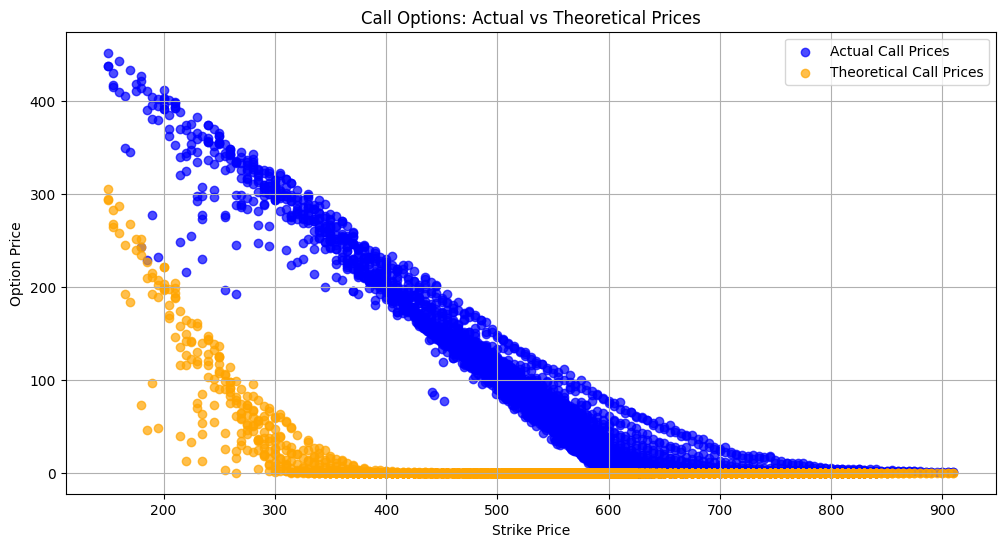

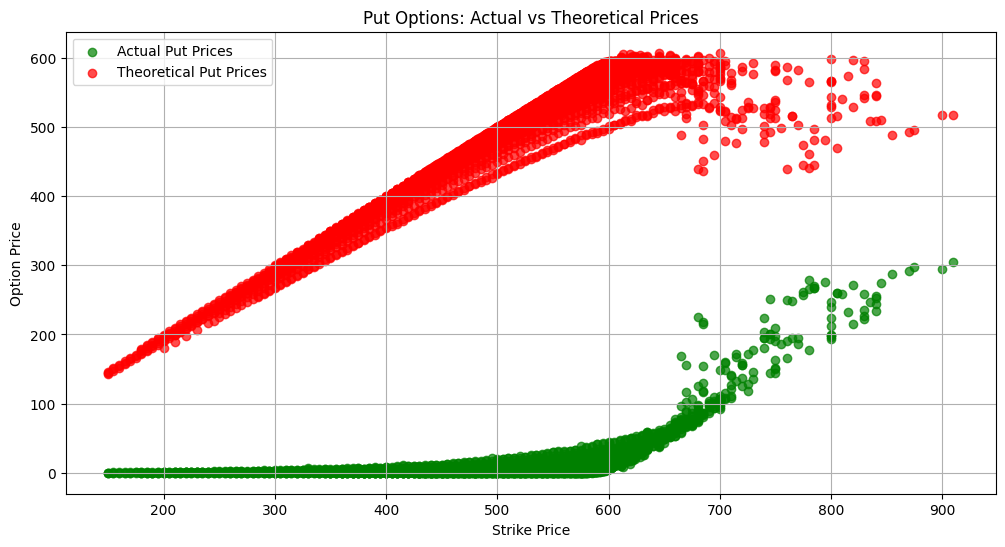

In [52]:
# Plot Calls
plt.figure(figsize=(12, 6))
plt.scatter(calls_data['strike'], calls_data['lastPrice'], label="Actual Call Prices", alpha=0.7, color="blue")
plt.scatter(calls_data['strike'], calls_data['TheoreticalPrice'], label="Theoretical Call Prices", alpha=0.7, color="orange")
plt.title("Call Options: Actual vs Theoretical Prices")
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.legend()
plt.grid()
plt.show()

# Plot Puts
plt.figure(figsize=(12, 6))
plt.scatter(puts_data['strike'], puts_data['lastPrice'], label="Actual Put Prices", alpha=0.7, color="green")
plt.scatter(puts_data['strike'], puts_data['TheoreticalPrice'], label="Theoretical Put Prices", alpha=0.7, color="red")
plt.title("Put Options: Actual vs Theoretical Prices")
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.legend()
plt.grid()
plt.show()


# **Premium**

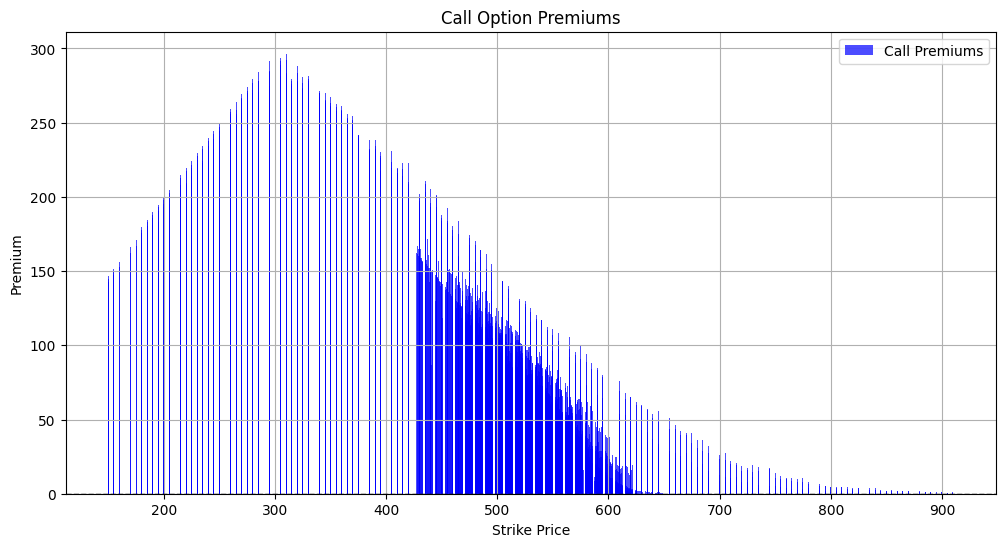

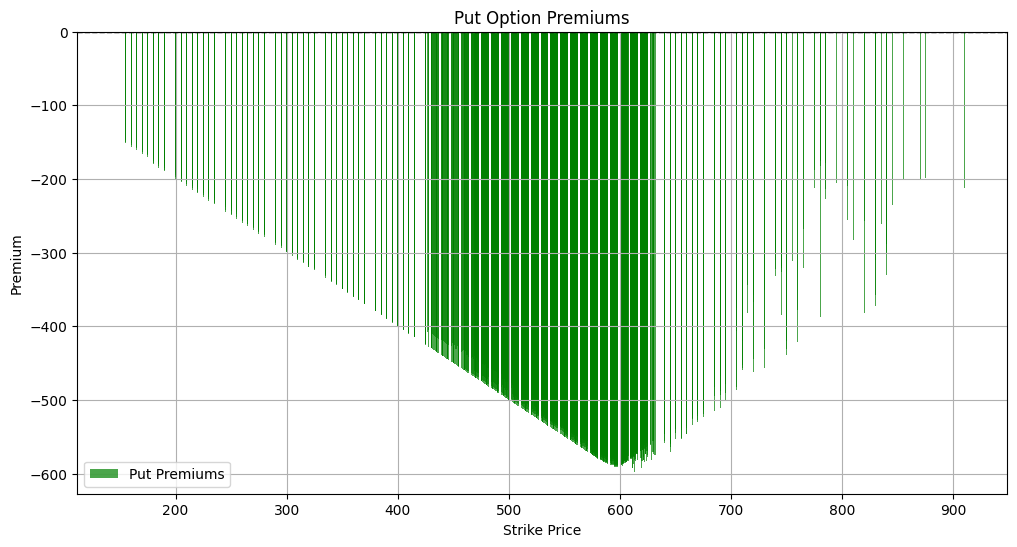

In [53]:
# Calculate premiums for calls and puts
calls_data['Premium'] = calls_data['lastPrice'] - calls_data['TheoreticalPrice']
puts_data['Premium'] = puts_data['lastPrice'] - puts_data['TheoreticalPrice']

# Plot Call Option Premiums
plt.figure(figsize=(12, 6))
plt.bar(calls_data['strike'], calls_data['Premium'], color='blue', alpha=0.7, label='Call Premiums')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Call Option Premiums")
plt.xlabel("Strike Price")
plt.ylabel("Premium")
plt.legend()
plt.grid()
plt.show()

# Plot Put Option Premiums
plt.figure(figsize=(12, 6))
plt.bar(puts_data['strike'], puts_data['Premium'], color='green', alpha=0.7, label='Put Premiums')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Put Option Premiums")
plt.xlabel("Strike Price")
plt.ylabel("Premium")
plt.legend()
plt.grid()
plt.show()
